# Gradient Descent

An example of x,y dataset where x is the biking distance and y is the kilocalorie burned.

First lets import numpy and lets use its genfromtxt function to load the data to points array, and lets plot the points to see the dataset.

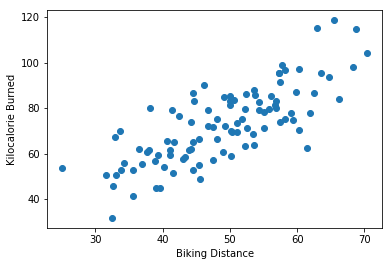

In [2]:
from numpy import *
import matplotlib.pyplot as plt

points = genfromtxt("F:/Python Works/Gradient Descent/biking_calorie.csv", delimiter=",")

plt.xlabel('Biking Distance')
plt.ylabel('Kilocalorie Burned')
x = []
y = []

for i in range(0, len(points)):
    x.append(points[i][0])
    y.append(points[i][1])

plt.scatter(x,y)
plt.show()

Here, the line of the best fit is the answer
         y = mx + b
         where m is the slope and b is the intercept
         
The error measure can be sum of square of errors.
         SSE = summation( (y - y^)^2)

In [6]:
# defining the function to compute error
def compute_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i][1] - (m * points[i][0] + b))**2
    return totalError/float(len(points))

In [7]:
compute_error(2, 3.1, points)

6974.208875318891

The above function appears to be slow. So we try to minimize the error in each step using partial derivative with respect to b and m.

In [8]:
# using gradient function
def step_gradient(b_current, m_current, points, learningRate):
    N = float(len(points))
    b_gradient = 0
    m_gradient = 0
    for i in range(0, len(points)):
        x = points[i][0]
        y = points[i][1]
        b_gradient += (-2/N)*(y-(m_current*x + b_current))
        m_gradient += (-2/N)*x*(y-(m_current*x+b_current))
        
    b_new = b_current - learningRate*b_gradient
    m_new = m_current - learningRate*m_gradient
    return [b_new, m_new]

Now we have got the required step gradient descent. So we can run it to get the optimized value of b and m.

In [11]:
def run(initial_b=0, initial_m=0, num_iterations=1000, learningRate=0.0001):
    b = initial_b
    m = initial_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learningRate)
    return [b, m]

In [12]:
run()

[0.08893651993741346, 1.4777440851894448]